In [1]:
# Plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# Other imports
import numpy as np

In [3]:
# Sample names
# The third sample is gonna be a subtraction
a = ['Sample 1',
     'Sample 2',
     'Sample 2 - Sample 1']

In [4]:
# Generate random normal data
# then subtract sample 1 from sample 2
b = [abs(np.random.normal(size=96)),
     abs(np.random.normal(size=96))]
b = np.array(b)
c = [(y - x) for (x, y) in zip(b[0], b[1])]
# Keep track of the min, max value
# useful later when the data will be plotted
vmin = min(b.flatten())
vmax = max(b.flatten())
vmin_diff = -max(abs(np.array(c)))
vmax_diff= -vmin_diff

In [5]:
# Plot parameters
# Starting point
i = 0.05
# Track height
i_space = 0.05
# How further up should the labels be
# with respect to the track
text_incr = 0.015
# Track distance
i_incr = 0.07
# Text size
t_size = 10

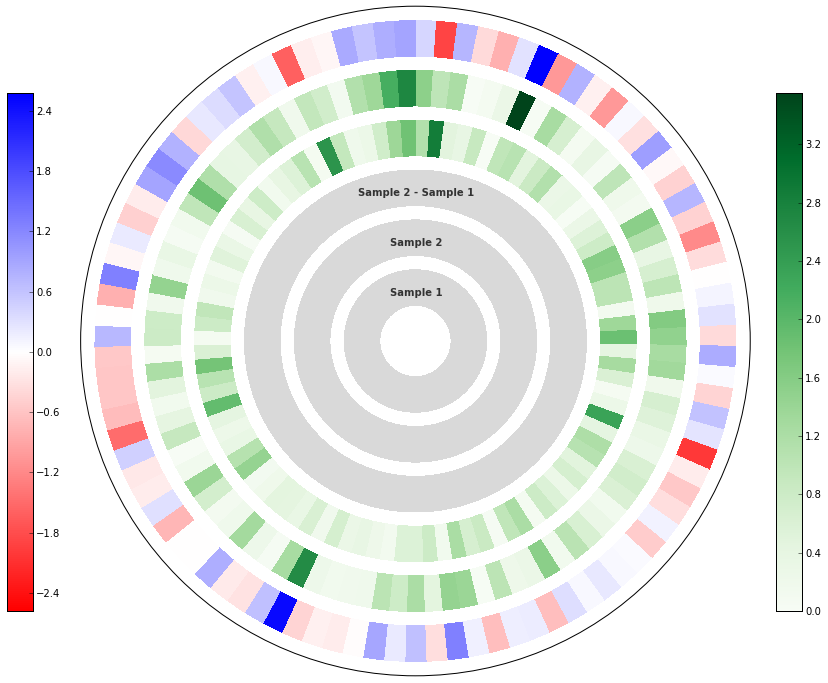

In [6]:
fig = plt.figure(figsize=(12, 12), dpi=300)
# Polar plot!
ax = fig.add_subplot(111, polar = True)
# Start from the top
ax.set_theta_offset(np.pi/2)
# Go clockwise
ax.set_theta_direction(-1)

# Plot fake tracks to report the sample names
for s_id in a:
    radius = np.linspace(i, i+i_space, 10)
    theta = np.linspace(0, 2*np.pi, 628)
    R,T  = np.meshgrid(radius,theta)

    ax.pcolor(T, R,
              np.array([[1 for y in range(10)]
                         for x in range(628)]),
              cmap=plt.cm.Greys,
              vmin=0, vmax=4)

    ax.text(0,
            i+text_incr,
            s_id,
            size=t_size,
            weight='black',
            alpha=0.77,
            ha='center')

    i += i_incr

# Plot the two tracks with the original samples
for data in b:
    radius = np.linspace(i, i+i_space, 10)
    theta = np.linspace(0, 2*np.pi, data.shape[0])
    R,T  = np.meshgrid(radius,theta)

    ax.pcolor(T, R,
              np.array([[x for y in range(10)] for x in data]),
                  cmap=plt.cm.Greens,
                  vmin=0, vmax=vmax)

    i += i_incr

# Plot the subtraction track
# using a different colormap
radius = np.linspace(i, i+i_space, 10)
theta = np.linspace(0, 2*np.pi, len(c))
R,T  = np.meshgrid(radius,theta)

ax.pcolor(T, R,
          np.array([[x for y in range(10)] for x in c]),
              cmap=plt.cm.bwr_r,
              vmin=vmin_diff, vmax=vmax_diff)

i += i_incr

#Turn off polar labels
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Plot terminates here
ax.set_rmax(i)

# First colorbar
cNorm  = colors.Normalize(vmin=vmin_diff, vmax=vmax_diff)
scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=plt.cm.bwr_r)
scalarMap.set_array(np.array(range(int(vmin_diff), int(vmax_diff), 100)))
cax = fig.add_axes([0.04, 0.2, 0.03, 0.6])
plt.colorbar(scalarMap, cax=cax)

# Subtraction colorbar
cNorm  = colors.Normalize(vmin=0, vmax=vmax)
scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=plt.cm.Greens)
scalarMap.set_array(np.array(range(0, int(vmax), 100)))
cax = fig.add_axes([0.93, 0.2, 0.03, 0.6])
plt.colorbar(scalarMap, cax=cax)
pass